### Part A

In [1]:
# HERE YOU WILL WRITE CODE TO TEST A NUMBER OF PREDICTORS
# AND FINALLY CHOOSE AND TRAIN THE PREDICTOR THAT YOU WILL BE USING FOR PART B

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, median_absolute_error, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# IMPORT DATA

In [3]:
df = pd.read_csv('CE802_P3_Data.csv')
df

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F28,F29,F30,F31,F32,F33,F34,F35,F36,Target
0,-282.00,54.09,2.91,-7.73,High,47.41,12423.04,191.12,6.62,-346.47,...,10,-2272.86,-1363.82,-52170.42,-16.99,651.76,51.90,-2399.64,-187.80,254.01
1,-170.84,41.25,8.91,-14.83,High,17.62,6568.94,250.88,4.50,-507.72,...,10,-2279.49,-1104.30,-19889.10,95.38,93.58,46.82,-1814.96,-374.19,651.88
2,-224.08,46.02,17.10,-9.35,Medium,90.80,14669.76,76.66,1.62,-225.57,...,8,-1270.38,-1508.36,-27407.16,121.09,735.53,36.08,-1955.82,-447.06,2535.19
3,-221.68,42.90,2.28,-6.76,Medium,25.61,12171.30,92.94,1.70,-714.57,...,10,-1345.74,-988.61,-29092.83,112.39,735.53,43.48,-1688.78,-174.57,706.24
4,-300.56,52.38,11.67,-5.39,Very low,59.93,15667.08,155.22,45.84,-248.04,...,6,372.06,-1385.47,-47932.59,135.37,470.91,20.48,-2391.94,-162.60,1155.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-220.08,44.49,17.91,-92.00,Very low,48.27,25755.22,214.58,0.02,-349.35,...,12,-1525.86,-1278.96,-40375.65,134.27,601.96,22.08,-1506.80,-465.63,-214.85
1496,-280.56,52.05,4.92,4.10,Low,16.55,16942.12,197.38,3.92,-287.55,...,12,-2285.61,-1065.89,-23753.40,115.84,358.45,30.06,-880.58,-435.30,2084.18
1497,-270.64,52.80,11.73,-33.03,High,34.69,12882.00,254.62,0.74,-429.96,...,4,-2781.87,-1694.21,-31274.76,155.57,283.70,31.46,-1682.64,-253.98,1295.07
1498,-282.58,53.34,4.56,29.13,Very high,42.44,10274.00,158.24,21.94,-426.75,...,2,-2117.34,-1327.29,-41070.48,127.33,657.26,34.00,-1965.04,-315.42,2377.58


In [4]:
# Check information of dataset

# No missing values found
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   object 
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   int64  
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     1500 non-null   float64
 15  F16     1500 non-null   float64
 16  F17     1500 non-null   float64
 17  F18     1500 non-null   float64
 18  F19     1500 non-null   float64
 19  F20     1500 non-null   float64
 20  F21     1500 non-null   object 
 21  F22     1500 non-null   float64
 22  

In [5]:
print('f5: ', np.unique(df['F5']))
print('f21: ', np.unique(df['F21']))

f5:  ['High' 'Low' 'Medium' 'Very high' 'Very low']
f21:  ['Europe' 'Rest' 'UK' 'USA']


In [6]:
def encode_cat(data: pd.DataFrame = None):
    
    f21_encoding = {'Europe': 0, 'UK': 1, 'Rest': 2, 'USA': 3}
    
    f5_encoding = {'Very low': 0, 
                    'Low': 1, 
                    'Medium': 2, 
                    'High': 3, 
                    'Very high': 4}
    
    data['F5'] = data['F5'].map(f5_encoding)
    data['F21'] = data['F21'].map(f21_encoding)
    
    return data

df = encode_cat(df)

In [7]:
df['F21'].value_counts()

1    393
2    378
3    365
0    364
Name: F21, dtype: int64

In [8]:
df

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F28,F29,F30,F31,F32,F33,F34,F35,F36,Target
0,-282.00,54.09,2.91,-7.73,3,47.41,12423.04,191.12,6.62,-346.47,...,10,-2272.86,-1363.82,-52170.42,-16.99,651.76,51.90,-2399.64,-187.80,254.01
1,-170.84,41.25,8.91,-14.83,3,17.62,6568.94,250.88,4.50,-507.72,...,10,-2279.49,-1104.30,-19889.10,95.38,93.58,46.82,-1814.96,-374.19,651.88
2,-224.08,46.02,17.10,-9.35,2,90.80,14669.76,76.66,1.62,-225.57,...,8,-1270.38,-1508.36,-27407.16,121.09,735.53,36.08,-1955.82,-447.06,2535.19
3,-221.68,42.90,2.28,-6.76,2,25.61,12171.30,92.94,1.70,-714.57,...,10,-1345.74,-988.61,-29092.83,112.39,735.53,43.48,-1688.78,-174.57,706.24
4,-300.56,52.38,11.67,-5.39,0,59.93,15667.08,155.22,45.84,-248.04,...,6,372.06,-1385.47,-47932.59,135.37,470.91,20.48,-2391.94,-162.60,1155.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-220.08,44.49,17.91,-92.00,0,48.27,25755.22,214.58,0.02,-349.35,...,12,-1525.86,-1278.96,-40375.65,134.27,601.96,22.08,-1506.80,-465.63,-214.85
1496,-280.56,52.05,4.92,4.10,1,16.55,16942.12,197.38,3.92,-287.55,...,12,-2285.61,-1065.89,-23753.40,115.84,358.45,30.06,-880.58,-435.30,2084.18
1497,-270.64,52.80,11.73,-33.03,3,34.69,12882.00,254.62,0.74,-429.96,...,4,-2781.87,-1694.21,-31274.76,155.57,283.70,31.46,-1682.64,-253.98,1295.07
1498,-282.58,53.34,4.56,29.13,4,42.44,10274.00,158.24,21.94,-426.75,...,2,-2117.34,-1327.29,-41070.48,127.33,657.26,34.00,-1965.04,-315.42,2377.58


In [9]:
def train_model(data: pd.DataFrame = None, 
                model: str = None):
    """Trains a model on the given data and returns performance metrics.
    
    Parameters:
    data (pd.DataFrame): The data to use for training.
    model (str): The name of the model.
    
    Returns:
    dict: A dictionary containing the model name, fill strategy, and performance metrics.
    """

    # Split the data into features and labels
    features = data.drop('Target', axis=1)
    labels = data['Target']
    

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.1, random_state=42)

    # Create a decision tree classifier
    ln = LinearRegression()

    # Fit the classifier to the training data
    ln.fit(X_train, y_train)

    # Make predictions on the test data
    pred = ln.predict(X_test)
    
    # Make predictions on the training data
    pred_train = ln.predict(X_train)
    
    # Calculate performance metrics for the training data
    train_mae = mean_absolute_error(y_train, pred_train)
    
    # Calculate performance metrics for the test data
    mae = mean_absolute_error(y_test, pred)

    # Return the model name and performance metrics
    # MAE - Mean Absolute Error
    # MAPE - Mean Absolute Percentage Error
    # MEAE - Median Absolute Error
    
    return {'Model': model,
            'Train MAE': train_mae,
            'MAE': mae}, y_test, pred

In [10]:
linear, actual, predicted = train_model(model='LinearRegression',
                     data=df)

linear

{'Model': 'LinearRegression',
 'Train MAE': 593.5348634369926,
 'MAE': 653.4237706695014}

In [11]:
pd.DataFrame(linear, index=[0])

,Model,Train MAE,MAE
0,LinearRegression,593.534863,653.423771


<AxesSubplot:ylabel='Target'>

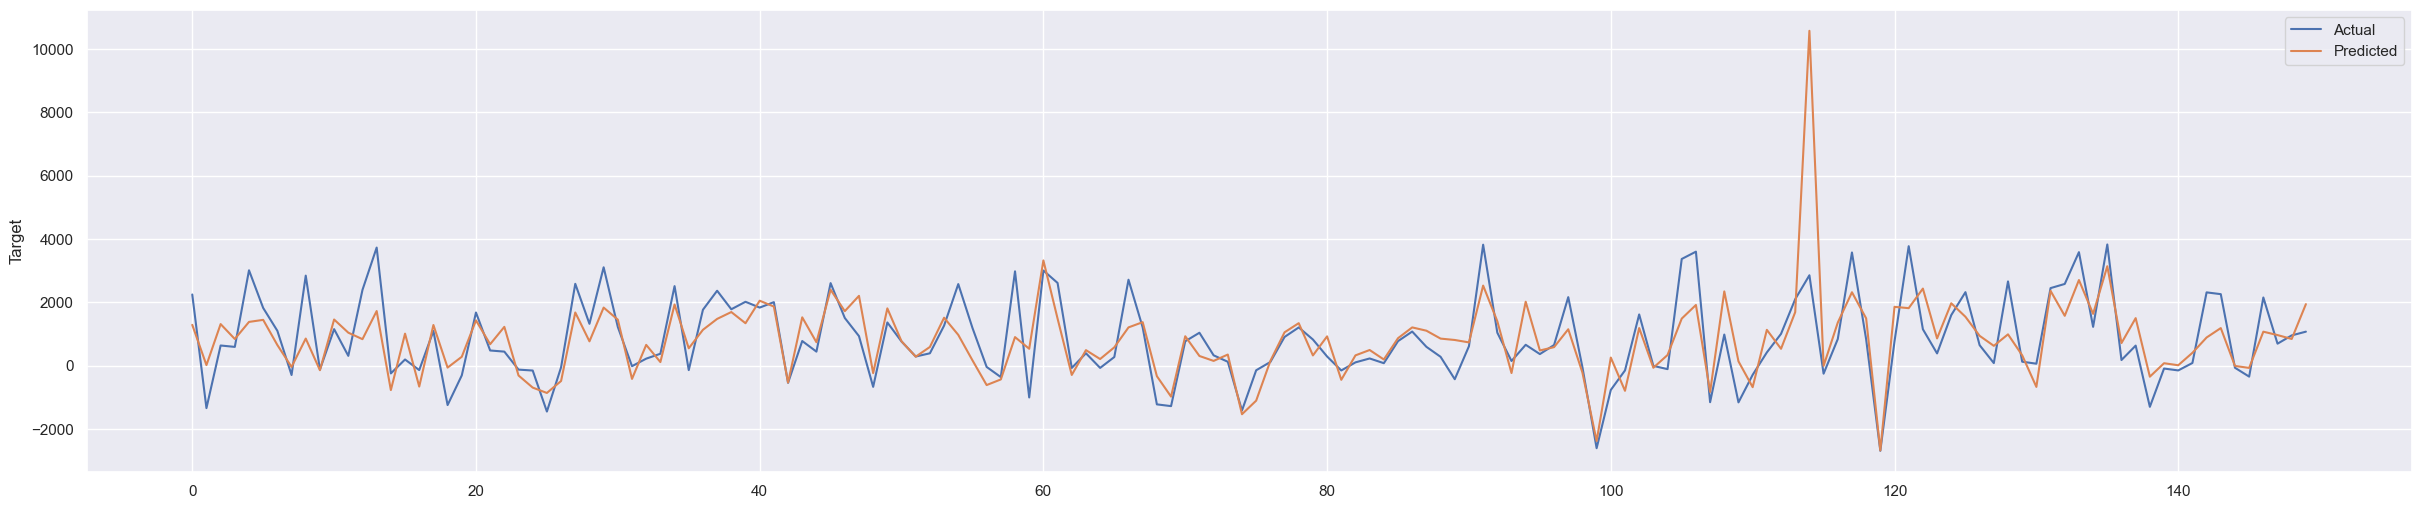

In [12]:
sns.set()
plt.figure(figsize=(30, 6))

sns.lineplot(x=range(len(actual)), y=actual, label='Actual')
sns.lineplot(x=range(len(predicted)), y=predicted, label='Predicted')

In [13]:
def train_more_models(data: pd.DataFrame = df,
                      test_size: int = None
                      ):
    """Trains multiple models on the given data and returns their performance scores.
    
    Parameters:
    data (pd.DataFrame): The data to use for training.
    
    Returns:
    pd.DataFrame: A dataframe containing the performance scores for each model.
    """
    
    
    # Define a dictionary of models to train
    model_list = {'linear-regression': LinearRegression(), 
                  'bayesian-ridge': BayesianRidge(), 
                  'gradient-boosting': GradientBoostingRegressor(),
                  'ada-boost': AdaBoostRegressor()}
    
    # Split the data into features and labels
    features = data.drop('Target', axis=1)
    labels = data['Target']

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=test_size, random_state=43547642)
    
    # Initialize a dictionary to store the model results
    model_results = {}
    
    # Train each model and store their performance scores
    for model_name, model in model_list.items():
        model.fit(X_train, y_train)
        
        # Make predictions on the training and test data
        pred_train = model.predict(X_train)
        pred = model.predict(X_test)
        
        # Calculate the accuracy scores for the training and test data
        train_mae = mean_absolute_error(y_train, pred_train)
        mae = mean_absolute_error(y_test, pred)
        
        # Add the accuracy scores to the model results dictionary
        model_results.update({model_name: [train_mae, mae, train_rmse, rmse]})
        
        plt.figure(figsize=(25, 6))
        plt.title(model_name)
        sns.lineplot(x=range(len(y_test)), y=y_test, label='Actual')
        sns.lineplot(x=range(len(pred)), y=pred, label='Predicted')
    
    # Convert the model results to a dataframe and rename the rows
    model_results = pd.DataFrame(model_results)
    model_results = model_results.rename(index={0: 'train_mae', 1: 'test_mae'})
        
    return model_results

,linear-regression,bayesian-ridge,gradient-boosting,ada-boost
train_mae,600.402641,876.801731,245.756988,613.164266
test_mae,619.780503,942.737169,353.862156,639.777476
train_rmse,756.851863,1109.003021,315.033803,704.033414
test_rmse,778.819313,1175.054078,472.273998,745.910925


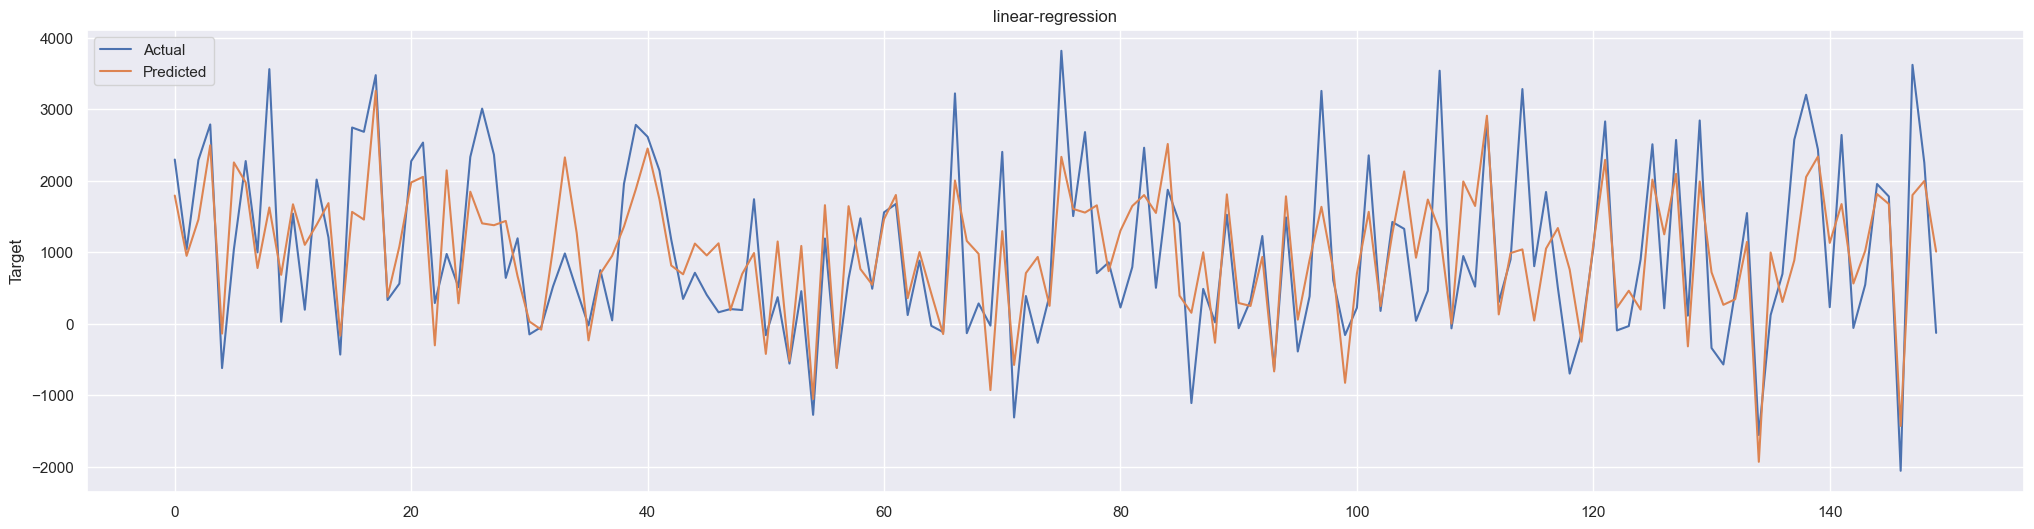

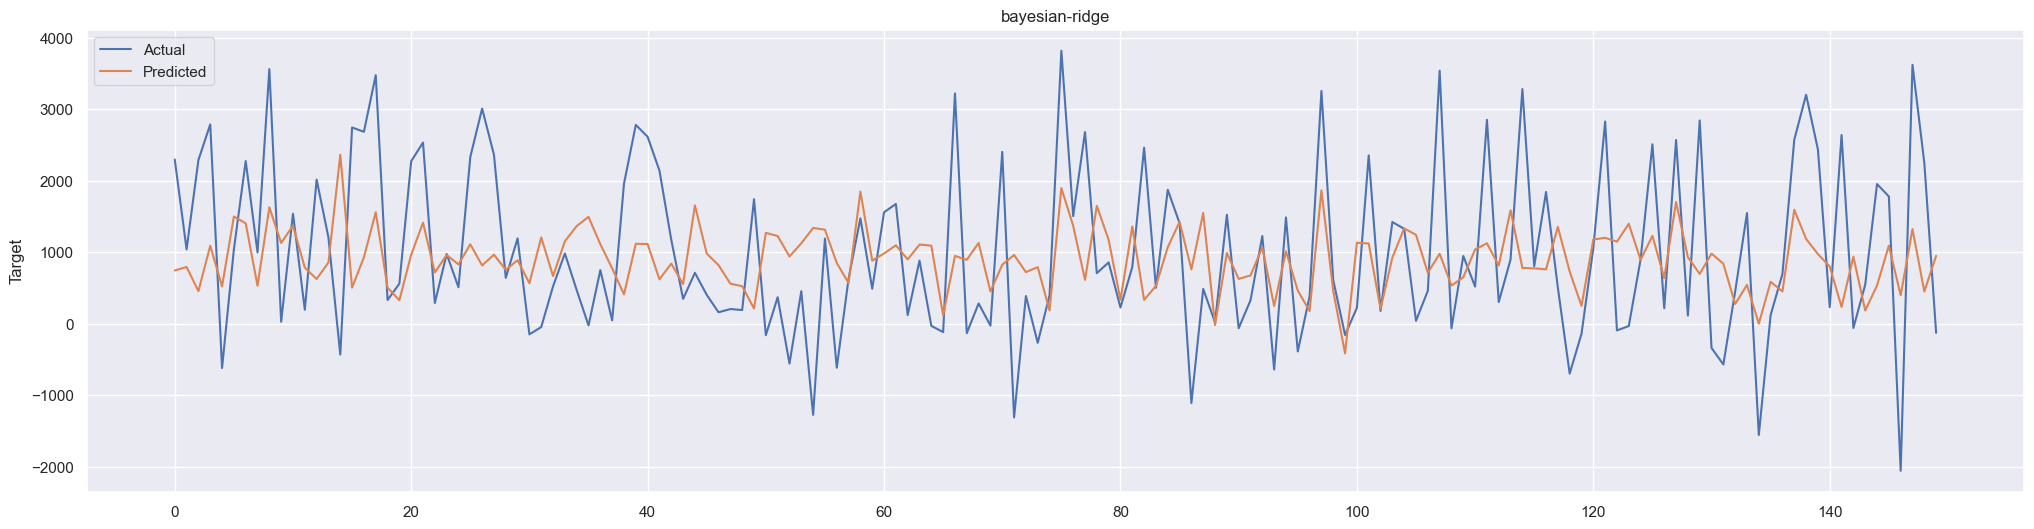

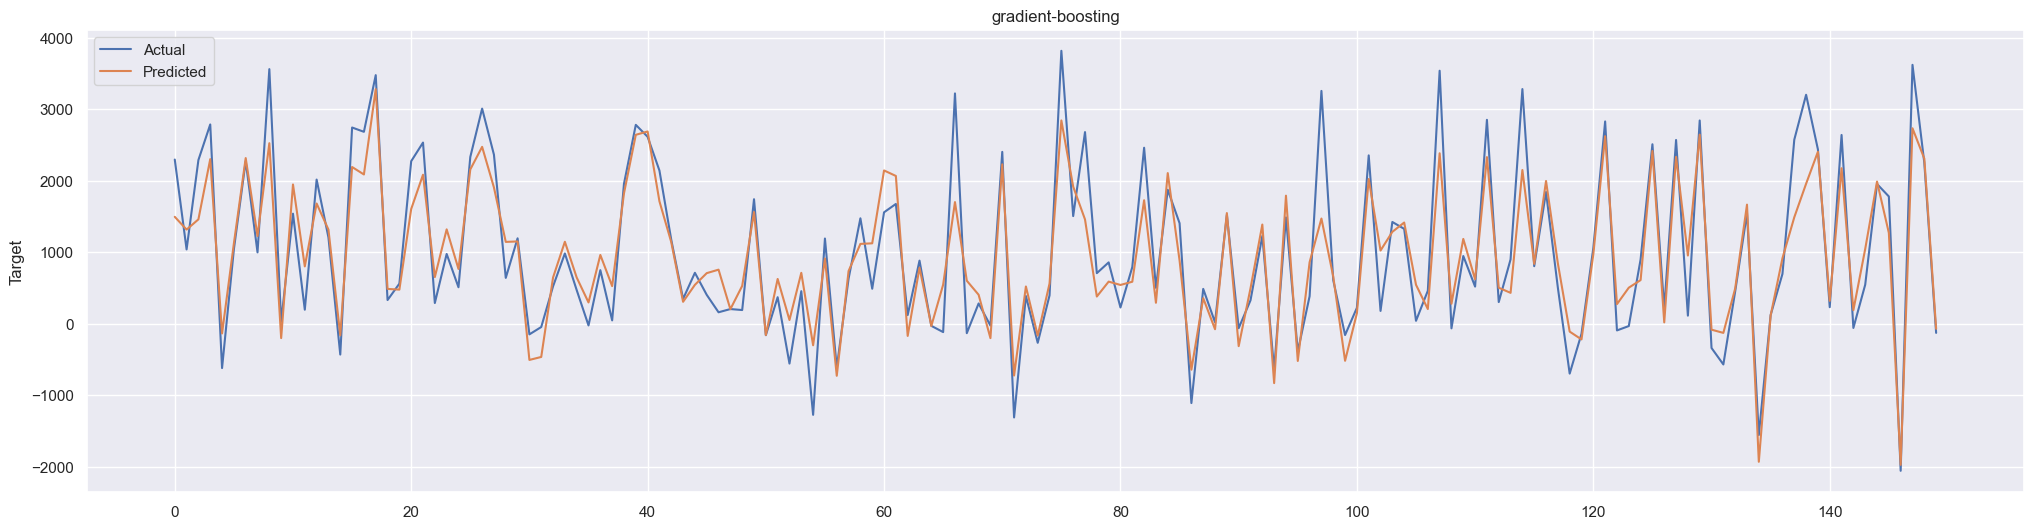

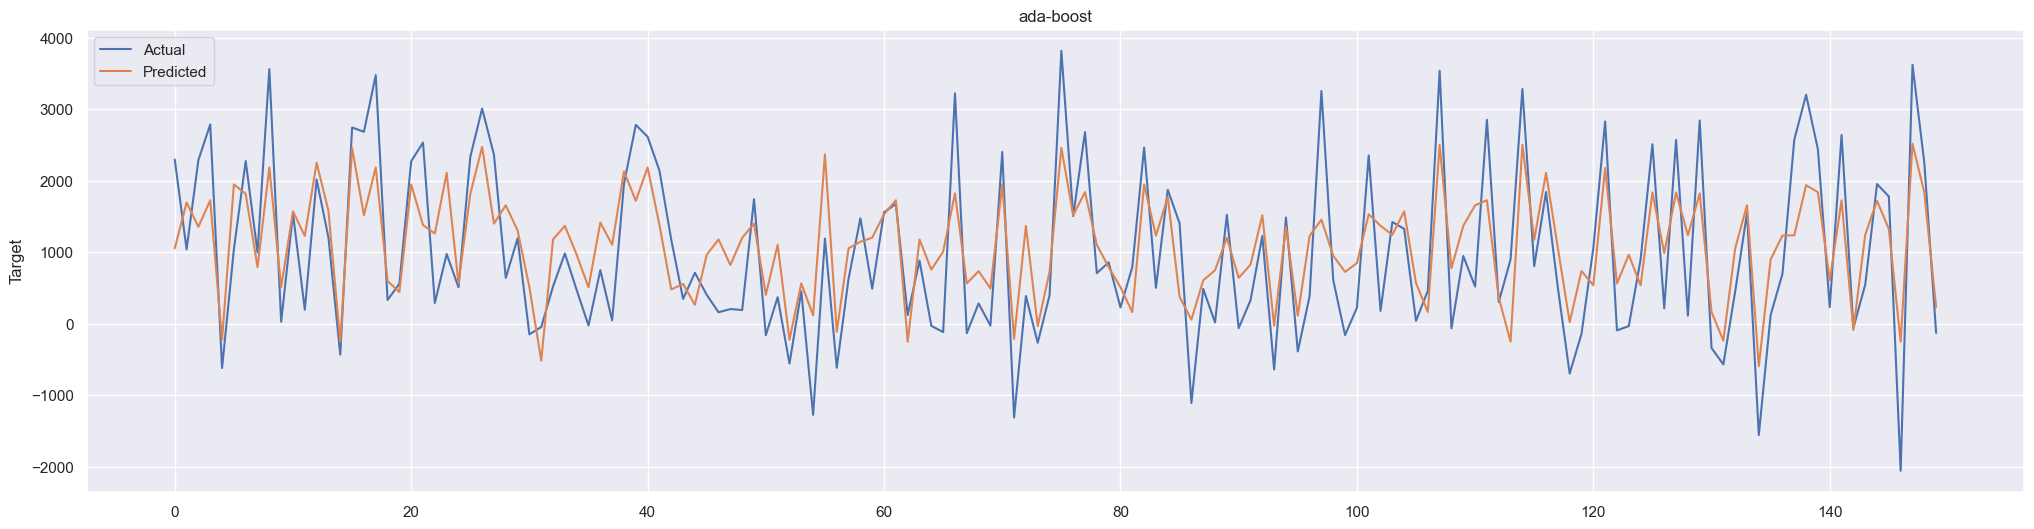

In [14]:
models = train_more_models(data=df, test_size=0.1)
models

In [17]:
br = GradientBoostingRegressor()

# Split the data into features and labels
features = df.drop('Target', axis=1)
labels = df['Target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.1, random_state=43547642)

br.fit(X_train, y_train)
        
# Make predictions on the training and test data
pred_train = br.predict(X_train)
pred = br.predict(X_test)

# Calculate the accuracy scores for the training and test data
train_mae = mean_absolute_error(y_train, pred_train)
mae = mean_absolute_error(y_test, pred)
train_rmse = np.sqrt(mean_squared_error(y_train, pred_train))
rmse = np.sqrt(mean_squared_error(y_test, pred))

scores = {'model_name': 'gradient-boosting-regressor',
          'train_mae': train_mae,
          'test_mae': mae,
          'train_rmse': train_rmse,
          'test_rmse': rmse}

scores

{'model_name': 'gradient-boosting-regressor',
 'train_mae': 245.75698776905907,
 'test_mae': 354.31705080068764,
 'train_rmse': 315.0338026457075,
 'test_rmse': 473.67978238482874}

In [18]:
pd.DataFrame(scores, index=[0])

,model_name,train_mae,test_mae,train_rmse,test_rmse
0,gradient-boosting-regressor,245.756988,354.317051,315.033803,473.679782


In [16]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# Load the test data
test_df = pd.read_csv('CE802_P3_Test.csv')

# Make sure you work on a copy
test_data = test_df.iloc[:,:-1].copy()

test_data = encode_cat(test_data)

predicted = br.predict(test_data)

# Replace the last (empty) column with your prediction
test_df.iloc[:,-1] = predicted

# Save to the destination file
test_df.to_csv('CE802_P3_Test_Predictions.csv', index=False, float_format='%.8g')

# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('CE802_P3_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P3_Test_Predictions.csv').iloc[:,:-1])